In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [35]:
osimhen_df = pd.read_csv("C:\\Users\\file path\\osimhen.csv")

In [36]:
osimhen_df

,TEAM,SHOTS,TOUCHES IN FINAL 3RD,Patient attack,Patient attack rank,GAMES,GOALS,GOALS INSIDE BOX,goals/goals inside box,goals inside box ranking,...,gca ranking,SHOT DISTANCE,shot distance ranking,DRIBBLES,dribbles/match,dribbles/match rank,TACKLES IN ATT 3RD,tackles per match,pressing ranking,Progressive passes received
0,MANCHESTER UNITED,1553,14261,10.889839,62,98,167,150,89.820359,100,...,62,16.28,94.0,713,7.275510,65,190,1.938776,68,NaN
1,CHELSEA,1149,13231,8.684151,78,87,116,102,87.931034,98,...,53,16.42,95.0,725,8.333333,74,209,2.402299,85,NaN
2,ARSENAL,1131,16796,6.733746,100,86,184,165,89.673913,99,...,98,16.78,97.0,696,8.093023,72,244,2.837209,100,NaN
3,LIVERPOOL,1579,14788,10.677576,63,94,208,184,88.461538,98,...,86,17.27,100.0,686,7.297872,65,233,2.478723,87,NaN
4,PSG,1225,15614,7.845523,86,83,197,172,87.309645,97,...,100,15.52,90.0,931,11.216867,100,220,2.650602,93,NaN
5,OSIMHEN,212,838,25.298329,30,68,45,45,100.000000,100,...,20,13.55,13.5,41,0.600000,60,14,0.205882,20,1022.0


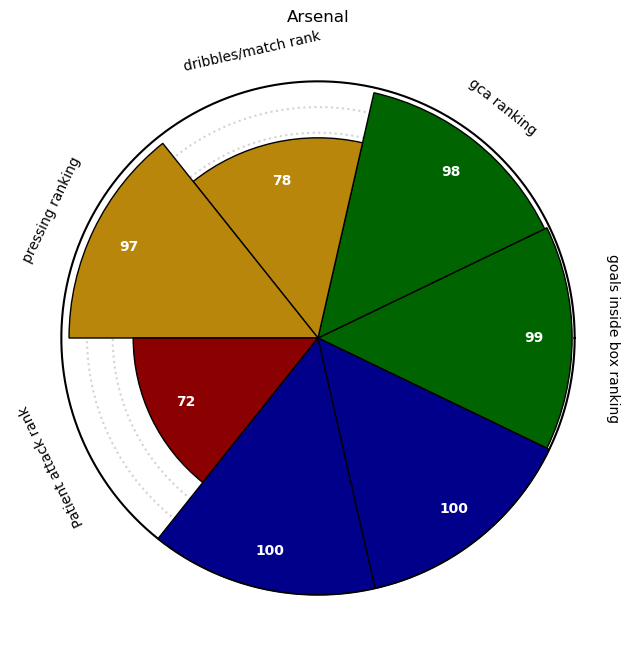

In [30]:
# Filter data for Arsenal
arsenal_df = osimhen_df[osimhen_df['TEAM'] == 'ARSENAL']

# Specify the columns you want to display in the radar chart
arsenal_df_columns_to_display = ['goals inside box ranking', 'gca ranking',
                      'shot/game ranking', 'shot distance ranking',
                      'dribbles/match rank', 'pressing ranking', 'Patient attack rank']  # Replace with your desired columns

# Example values
values = arsenal_df[arsenal_df_columns_to_display].values.tolist()[0]

# Convert values to integers
values = [int(value) for value in values]

# Example colors for each column
column_colors = {
    'Patient attack rank': 'darkblue',
    'goals inside box ranking': 'darkgreen',
    'shot/game ranking': 'darkgoldenrod',
    'shot distance ranking': 'darkgoldenrod',
    'dribbles/match rank': 'darkred',
    'gca ranking': 'darkgreen',
    'pressing ranking': 'darkblue'
}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Number of categories
num_categories = len(arsenal_df_columns_to_display)

# Width of each bar
bar_width = 2 * np.pi / num_categories

# Position of bars on theta-axis
theta = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Plot the bars and add values inside each bar
for i, (angle, value, column) in enumerate(zip(theta, values, arsenal_df_columns_to_display)):
    color = column_colors.get(column, 'skyblue')  # Get color for the column, default to 'skyblue' if not specified
    ax.bar(angle, value, width=bar_width, color=color, edgecolor='black', zorder=1)  # Setting zorder to 1 to ensure bars are on top
    ax.text(angle, value - 15, str(value), ha='center', va='center', color='white', weight='bold', clip_on=True)

    # Add labels outside the circle in a curved manner
label_distance = max(values) * 1.1
label_offset = -5
for i, (angle, label) in enumerate(zip(theta, osimhen_df_columns_to_display)):
    ax.text(angle, label_distance - label_offset, label, ha='center', va='center', rotation=i * 360 / num_categories - 90, clip_on=True)

# Remove the radial lines and labels
ax.grid(False)
ax.set_xticklabels([])

# Remove the radial ticks
ax.set_yticks([])

# Set the radial axis limits to ensure the circle outside the chart is removed
ax.set_ylim(0, max(values) * 1.2)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Plot circular lines for calibration
for mark in range(10, 101, 10):
    linestyle = 'solid' if mark == 100 else 'dotted'
    linewidth = 1.5 if mark == 100 else 1.5
    color = 'black' if mark == 100 else 'lightgrey'
    num_points = 200 if mark == 100 else 100
    
    ax.plot(np.linspace(0, 2 * np.pi, num_points), np.full(num_points, mark), color=color,
            linestyle=linestyle, linewidth=linewidth, zorder=0)  # Setting zorder to 0 to ensure lines are behind bars

# Hide the radial axis and spine
ax.spines['polar'].set_visible(False)

# Add a title
ax.set_title('Arsenal')

# Show the plot
plt.show()

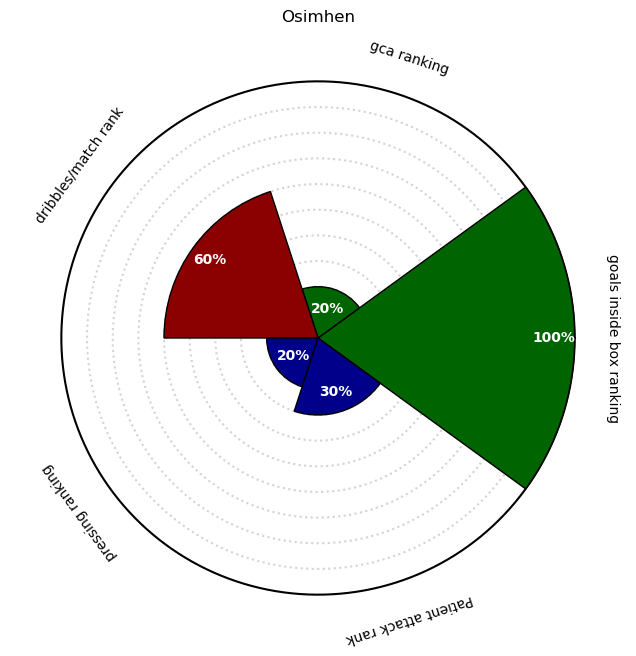

In [43]:
# Filter data for Osimhen
osimhen_df_filter = osimhen_df[osimhen_df['TEAM'] == 'OSIMHEN']

# Specify the columns you want to display in the radar chart
osimhen_df_columns_to_display = ['goals inside box ranking', 'gca ranking',
                      'dribbles/match rank', 'pressing ranking', 'Patient attack rank']  # Replace with your desired columns

# Get the corresponding values for the specified columns
values = osimhen_df_filter[osimhen_df_columns_to_display].values.tolist()[0]

# Convert values to integers
values = [int(value) for value in values]

# Example colors for each column
column_colors = {
    'Patient attack rank': 'darkblue',
    'goals inside box ranking': 'darkgreen',
    'shot/game ranking': 'darkgoldenrod',
    'shot distance ranking': 'darkgoldenrod',
    'dribbles/match rank': 'darkred',
    'gca ranking': 'darkgreen',
    'pressing ranking': 'darkblue'
}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Number of categories
num_categories = len(osimhen_df_columns_to_display)

# Width of each bar
bar_width = 2 * np.pi / num_categories

# Position of bars on theta-axis
theta = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Plot the bars and add values inside each bar
for i, (angle, value, column) in enumerate(zip(theta, values, osimhen_df_columns_to_display)):
    color = column_colors.get(column, 'skyblue')  # Get color for the column, default to 'skyblue' if not specified
    ax.bar(angle, value, width=bar_width, color=color, edgecolor='black', zorder=1)  # Setting zorder to 1 to ensure bars are on top
    ax.text(angle, value -8, str(value) + '%', ha='center', va='center', color='white', weight='bold', clip_on=True)
  
    # Remove the radial lines and labels
ax.grid(False)
ax.set_xticklabels([])

# Remove the radial ticks
ax.set_yticks([])

# Set the radial axis limits to ensure the circle outside the chart is removed
ax.set_ylim(0, max(values) * 1.2)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Plot circular lines for calibration
for mark in range(10, 101, 10):
    linestyle = 'solid' if mark == 100 else 'dotted'
    linewidth = 1.5 if mark == 100 else 1.5
    color = 'black' if mark == 100 else 'lightgrey'
    num_points = 200 if mark == 100 else 100
    
    ax.plot(np.linspace(0, 2 * np.pi, num_points), np.full(num_points, mark), color=color,
            linestyle=linestyle, linewidth=linewidth, zorder=0)  # Setting zorder to 0 to ensure lines are behind bars
    
# Add labels outside the circle in a curved manner
label_distance = max(values) * 1.1
label_offset = -5
for i, (angle, label) in enumerate(zip(theta, osimhen_df_columns_to_display)):
    ax.text(angle, label_distance - label_offset, label, ha='center', va='center', rotation=i * 360 / num_categories - 90, clip_on=True)

# Hide the radial axis and spine
ax.spines['polar'].set_visible(False)

# Add a title
ax.set_title('Osimhen')

# Show the plot
plt.show()

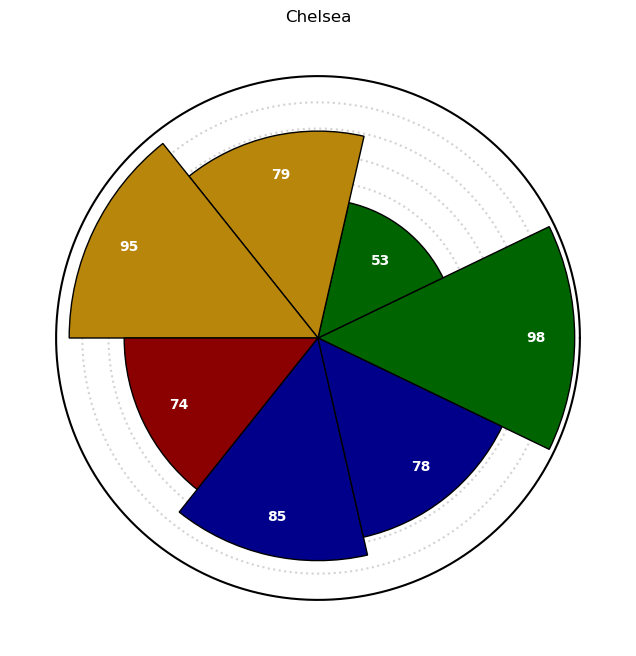

In [183]:
# Filter data for Chelsea
chelsea_df = osimhen_df[osimhen_df['TEAM'] == 'CHELSEA']

# Specify the columns you want to display in the radar chart
chelsea_df_columns_to_display = ['goals inside box ranking', 'gca ranking',
                      'shot/game ranking', 'shot distance ranking',
                      'dribbles/match rank', 'pressing ranking', 'Patient attack rank']  # Replace with your desired columns

# Example values
values = chelsea_df[chelsea_df_columns_to_display].values.tolist()[0]

# Convert values to integers
values = [int(value) for value in values]

# Example colors for each column
column_colors = {
    'Patient attack rank': 'darkblue',
    'goals inside box ranking': 'darkgreen',
    'shot/game ranking': 'darkgoldenrod',
    'shot distance ranking': 'darkgoldenrod',
    'dribbles/match rank': 'darkred',
    'gca ranking': 'darkgreen',
    'pressing ranking': 'darkblue'
}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Number of categories
num_categories = len(chelsea_df_columns_to_display)

# Width of each bar
bar_width = 2 * np.pi / num_categories

# Position of bars on theta-axis
theta = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Plot the bars and add values inside each bar
for i, (angle, value, column) in enumerate(zip(theta, values, chelsea_df_columns_to_display)):
    color = column_colors.get(column, 'skyblue')  # Get color for the column, default to 'skyblue' if not specified
    ax.bar(angle, value, width=bar_width, color=color, edgecolor='black', zorder=1)  # Setting zorder to 1 to ensure bars are on top
    ax.text(angle, value - 15, str(value), ha='center', va='center', color='white', weight='bold', clip_on=True)

# Remove the radial lines and labels
ax.grid(False)
ax.set_xticklabels([])

# Remove the radial ticks
ax.set_yticks([])

# Set the radial axis limits to ensure the circle outside the chart is removed
ax.set_ylim(0, max(values) * 1.2)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Plot circular lines for calibration
for mark in range(10, 101, 10):
    linestyle = 'solid' if mark == 100 else 'dotted'
    linewidth = 1.5 if mark == 100 else 1.5
    color = 'black' if mark == 100 else 'lightgrey'
    num_points = 200 if mark == 100 else 100
    
    ax.plot(np.linspace(0, 2 * np.pi, num_points), np.full(num_points, mark), color=color,
            linestyle=linestyle, linewidth=linewidth, zorder=0)  # Setting zorder to 0 to ensure lines are behind bars

# Hide the radial axis and spine
ax.spines['polar'].set_visible(False)

# Add a title
ax.set_title('Chelsea')

# Show the plot
plt.show()

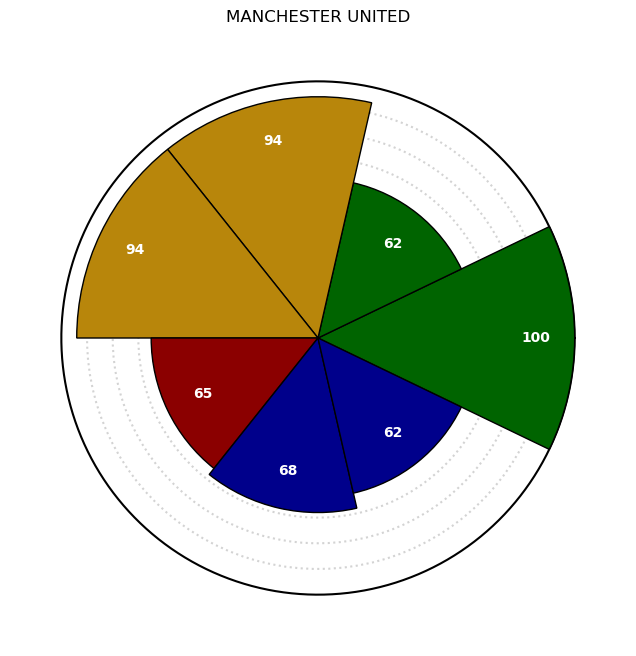

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data for Chelsea
manutd_df = osimhen_df[osimhen_df['TEAM'] == 'MANCHESTER UNITED']

# Specify the columns you want to display in the radar chart
manutd_df_columns_to_display = ['goals inside box ranking', 'gca ranking',
                      'shot/game ranking', 'shot distance ranking',
                      'dribbles/match rank', 'pressing ranking', 'Patient attack rank']  # Replace with your desired columns

# Example values
values = manutd_df[manutd_df_columns_to_display].values.tolist()[0]

# Convert values to integers
values = [int(value) for value in values]

# Example colors for each column
column_colors = {
    'Patient attack rank': 'darkblue',
    'goals inside box ranking': 'darkgreen',
    'shot/game ranking': 'darkgoldenrod',
    'shot distance ranking': 'darkgoldenrod',
    'dribbles/match rank': 'darkred',
    'gca ranking': 'darkgreen',
    'pressing ranking': 'darkblue'
}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Number of categories
num_categories = len(manutd_df_columns_to_display)

# Width of each bar
bar_width = 2 * np.pi / num_categories

# Position of bars on theta-axis
theta = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Plot the bars and add values inside each bar
for i, (angle, value, column) in enumerate(zip(theta, values, manutd_df_columns_to_display)):
    color = column_colors.get(column, 'skyblue')  # Get color for the column, default to 'skyblue' if not specified
    ax.bar(angle, value, width=bar_width, color=color, edgecolor='black', zorder=1)  # Setting zorder to 1 to ensure bars are on top
    ax.text(angle, value - 15, str(value), ha='center', va='center', color='white', weight='bold', clip_on=True)

# Remove the radial lines and labels
ax.grid(False)
ax.set_xticklabels([])

# Remove the radial ticks
ax.set_yticks([])

# Set the radial axis limits to ensure the circle outside the chart is removed
ax.set_ylim(0, max(values) * 1.2)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Plot circular lines for calibration
for mark in range(10, 101, 10):
    linestyle = 'solid' if mark == 100 else 'dotted'
    linewidth = 1.5 if mark == 100 else 1.5
    color = 'black' if mark == 100 else 'lightgrey'
    num_points = 200 if mark == 100 else 100
    
    ax.plot(np.linspace(0, 2 * np.pi, num_points), np.full(num_points, mark), color=color,
            linestyle=linestyle, linewidth=linewidth, zorder=0)  # Setting zorder to 0 to ensure lines are behind bars

# Hide the radial axis and spine
ax.spines['polar'].set_visible(False)

# Add a title
ax.set_title('MANCHESTER UNITED')

# Show the plot
plt.show()

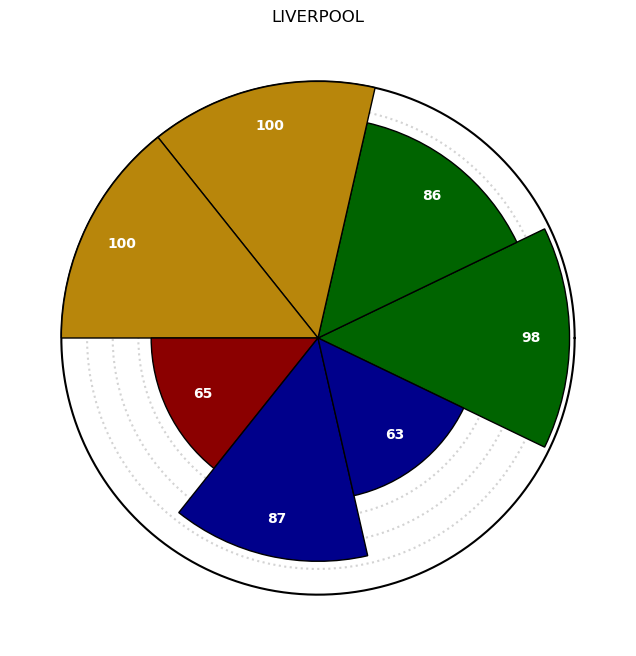

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data for Chelsea
liverpool_df = osimhen_df[osimhen_df['TEAM'] == 'LIVERPOOL']

# Specify the columns you want to display in the radar chart
liverpool_df_columns_to_display = ['goals inside box ranking', 'gca ranking',
                      'shot/game ranking', 'shot distance ranking',
                      'dribbles/match rank', 'pressing ranking', 'Patient attack rank']  # Replace with your desired columns

# Example values
values = liverpool_df[liverpool_df_columns_to_display].values.tolist()[0]

# Convert values to integers
values = [int(value) for value in values]

# Example colors for each column
column_colors = {
    'Patient attack rank': 'darkblue',
    'goals inside box ranking': 'darkgreen',
    'shot/game ranking': 'darkgoldenrod',
    'shot distance ranking': 'darkgoldenrod',
    'dribbles/match rank': 'darkred',
    'gca ranking': 'darkgreen',
    'pressing ranking': 'darkblue'
}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Number of categories
num_categories = len(liverpool_df_columns_to_display)

# Width of each bar
bar_width = 2 * np.pi / num_categories

# Position of bars on theta-axis
theta = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Plot the bars and add values inside each bar
for i, (angle, value, column) in enumerate(zip(theta, values, liverpool_df_columns_to_display)):
    color = column_colors.get(column, 'skyblue')  # Get color for the column, default to 'skyblue' if not specified
    ax.bar(angle, value, width=bar_width, color=color, edgecolor='black', zorder=1)  # Setting zorder to 1 to ensure bars are on top
    ax.text(angle, value - 15, str(value), ha='center', va='center', color='white', weight='bold', clip_on=True)

# Remove the radial lines and labels
ax.grid(False)
ax.set_xticklabels([])

# Remove the radial ticks
ax.set_yticks([])

# Set the radial axis limits to ensure the circle outside the chart is removed
ax.set_ylim(0, max(values) * 1.2)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Plot circular lines for calibration
for mark in range(10, 101, 10):
    linestyle = 'solid' if mark == 100 else 'dotted'
    linewidth = 1.5 if mark == 100 else 1.5
    color = 'black' if mark == 100 else 'lightgrey'
    num_points = 200 if mark == 100 else 100
    
    ax.plot(np.linspace(0, 2 * np.pi, num_points), np.full(num_points, mark), color=color,
            linestyle=linestyle, linewidth=linewidth, zorder=0)  # Setting zorder to 0 to ensure lines are behind bars

# Hide the radial axis and spine
ax.spines['polar'].set_visible(False)

# Add a title
ax.set_title('LIVERPOOL')

# Show the plot
plt.show()

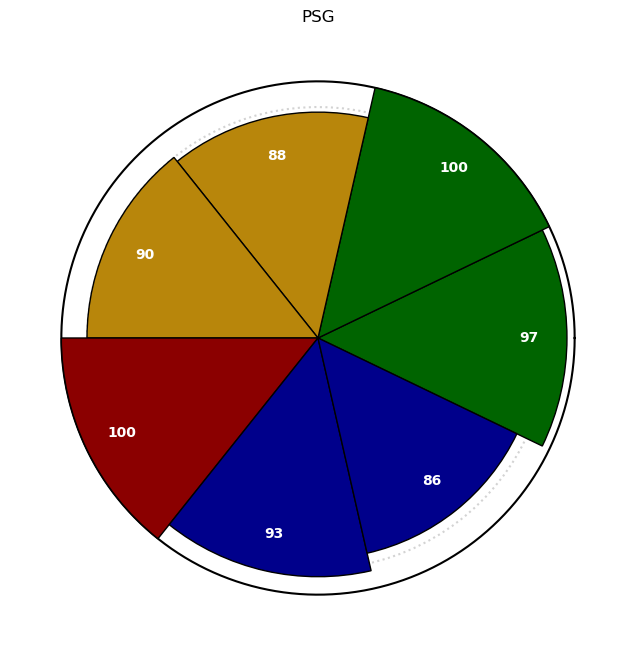

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data for Chelsea
psg_df = osimhen_df[osimhen_df['TEAM'] == 'PSG']

# Specify the columns you want to display in the radar chart
psg_df_columns_to_display = ['goals inside box ranking', 'gca ranking',
                      'shot/game ranking', 'shot distance ranking',
                      'dribbles/match rank', 'pressing ranking', 'Patient attack rank']  # Replace with your desired columns

# Example values
values = psg_df[psg_df_columns_to_display].values.tolist()[0]

# Convert values to integers
values = [int(value) for value in values]

# Example colors for each column
column_colors = {
    'Patient attack rank': 'darkblue',
    'goals inside box ranking': 'darkgreen',
    'shot/game ranking': 'darkgoldenrod',
    'shot distance ranking': 'darkgoldenrod',
    'dribbles/match rank': 'darkred',
    'gca ranking': 'darkgreen',
    'pressing ranking': 'darkblue'
}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Number of categories
num_categories = len(psg_df_columns_to_display)

# Width of each bar
bar_width = 2 * np.pi / num_categories

# Position of bars on theta-axis
theta = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Plot the bars and add values inside each bar
for i, (angle, value, column) in enumerate(zip(theta, values, psg_df_columns_to_display)):
    color = column_colors.get(column, 'skyblue')  # Get color for the column, default to 'skyblue' if not specified
    ax.bar(angle, value, width=bar_width, color=color, edgecolor='black', zorder=1)  # Setting zorder to 1 to ensure bars are on top
    ax.text(angle, value - 15, str(value), ha='center', va='center', color='white', weight='bold', clip_on=True)

# Remove the radial lines and labels
ax.grid(False)
ax.set_xticklabels([])

# Remove the radial ticks
ax.set_yticks([])

# Set the radial axis limits to ensure the circle outside the chart is removed
ax.set_ylim(0, max(values) * 1.2)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Plot circular lines for calibration
for mark in range(10, 101, 10):
    linestyle = 'solid' if mark == 100 else 'dotted'
    linewidth = 1.5 if mark == 100 else 1.5
    color = 'black' if mark == 100 else 'lightgrey'
    num_points = 200 if mark == 100 else 100
    
    ax.plot(np.linspace(0, 2 * np.pi, num_points), np.full(num_points, mark), color=color,
            linestyle=linestyle, linewidth=linewidth, zorder=0)  # Setting zorder to 0 to ensure lines are behind bars

# Hide the radial axis and spine
ax.spines['polar'].set_visible(False)

# Add a title
ax.set_title('PSG')

# Show the plot
plt.show()